Importes

In [33]:
#importações
import pandas as pd
import seaborn as sns
#!pip install -U pandasql
import pandasql
import numpy as np
import matplotlib.pyplot as plt
#!pip install folium
import folium
from folium.plugins import HeatMap



Quais os quatro estados com maior frequência de ralatos

In [34]:
#!pip install -U pandasql

baseOvnis = pd.read_csv("OVNIS.csv")

#Filtrar os estados
estados = baseOvnis['State'].value_counts().head(4)

#Criar o dataFrame
df_relatos = pd.DataFrame(estados)

#Criar coluna com os nome dos estado da index
df_relatos['stateName'] = df_relatos.index

#redefinir index
df_relatos.reset_index(drop=True, inplace=True)

df_relatos


,State,stateName
0,7917,CA
1,4359,FL
2,3230,WA
3,2883,TX


Quais os tipos de OVNIs mais populares (Geral)

In [35]:
#Filtrar os Ovnis mais populares
tipos = baseOvnis['Shape'].value_counts().head(4)

#Criar o dataFrame
df_ovnis = pd.DataFrame(tipos)

#Criar coluna com os nome dos Ovnis da index
df_ovnis['shapesName'] = df_ovnis.index

#trocar nome
df_ovnis.columns =  ['Quantidade', 'shapesName']

#redefinir index
df_ovnis.reset_index(drop=True, inplace=True)

df_ovnis

,Quantidade,shapesName
0,15407,Light
1,8303,Circle
2,6462,Triangle
3,6442,Fireball


Filtros por Estado x Tipos

In [36]:
#Aparições por estado
import pandas
#!pip install -U pandasql
import pandasql

baseOvnis = pd.read_csv("OVNIS.csv")


q= """
SELECT State, Shape, COUNT(*) AS VIEWS 
FROM baseOvnis
WHERE State IN('CA','FL','WA','TX') AND Shape IN('Light','Circle','Triangle','Fireball')
GROUP BY State, Shape
ORDER BY VIEWS DESC
"""

T1 = pandasql.sqldf(q, locals())
pd.DataFrame(T1)
# T1

,State,Shape,VIEWS
0,CA,Light,1701
1,CA,Circle,881
2,FL,Light,826
3,WA,Light,780
4,CA,Fireball,703
5,CA,Triangle,640
6,TX,Light,579
7,FL,Circle,551
8,FL,Fireball,541
9,FL,Triangle,344


Gráficos

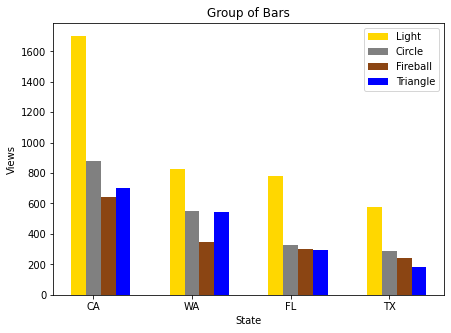

In [37]:
#Gráfico 1
# Primeiramente importamos as libs
import numpy as np
import matplotlib.pyplot as plt

Light = [1701, 826, 780, 579]
Circle = [881, 551, 330, 290]
Fireball  = [703, 541, 296, 183]
Triangle  = [640, 344, 301, 245]
 

# Definindo a largura das barras 
barWidth = 0.15

# Aumentando o gráfico
plt.figure(figsize=(7,5))

# Definindo a posição das barras
r1 = np.arange(len(Light))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Criando as barras
plt.bar(r1, Light, color='gold', width=barWidth, label='Light')
plt.bar(r2, Circle, color='grey', width=barWidth, label='Circle')
plt.bar(r3, Triangle	, color='saddlebrown', width=barWidth, label='Fireball')
plt.bar(r4, Fireball, color='blue', width=barWidth, label='Triangle')
 
# Adiciando legendas as barras
plt.xlabel('State')
plt.xticks([r + barWidth for r in range(len(Light))], ['CA', 'WA', 'FL', 'TX'])
plt.ylabel('Views')
plt.title('Group of Bars')
 
# Criando a legenda e exibindo o gráfico
plt.legend()
plt.show()

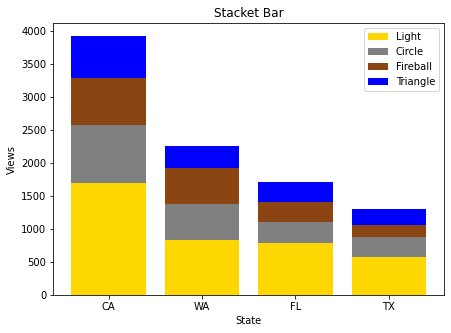

In [38]:
#Gráfico 2
Light  = np.array((1701, 826, 780, 579))
Circle = np.array((881, 551, 330, 290))
Fireball  = np.array((703, 541, 296, 183))
Triangle  = np.array((640, 344, 301, 245))

shape = ['Light','Circle','Fireball', 'Triangle']

states = ['CA','WA','FL', 'TX']

# Aumentando o gráfico
plt.figure(figsize=(7,5))

# Criando as barras
plt.bar(states, Light, color = 'gold')
plt.bar(states, Circle, color = 'grey', bottom = Light)
plt.bar(states, Fireball, color = 'saddlebrown', bottom = Light + Circle)
plt.bar(states, Triangle, color = 'blue', bottom = Light + Circle + Fireball)

# Adiciando legendas as barras
plt.xlabel('State')
plt.ylabel('Views')
plt.title('Stacket Bar')
plt.legend(('Light', 'Circle', 'Fireball', 'Triangle'))

plt.show()

Mapas

In [39]:
#!pip install folium

import folium


Especificando diferentes estilos

In [ ]:
folium.Map(
    location=[-19.916667,-43.933333],
    tiles='Stamen Toner',
)

In [ ]:
folium.Map(
    location=[-19.916667,-43.933333],
    tiles='Stamen Terrain',
)

Mapa CA

In [ ]:
CAlat = 37.2502200
CAlon = -119.7512600

WAlat = 38.904
WAlon = -77.0171

FLlat = 28.4159
FLlon = -81.2988

TXlat = 29.3838500
TXlon = -94.9027000

#mapa = folium.Map(location=[CAlat, CAlon])
#mapa = folium.Map(location=[WAlat, WAlon])
#mapa = folium.Map(location=[FLlat, FLlon])
mapa = folium.Map(location=[TXlat, TXlon])

mapa

zipcopes

In [40]:
#instalando a bibioteca zipcode
#!pip install zipcodes
#importando a biblioteca zipcode
import zipcodes
#listando o conteúdo da biblioteca zipcode que está em formato json
zipcodes_json = zipcodes.list_all()
#transformando em um Dataframe a biblioteca zipcode
df_zipcodes = pd.DataFrame(zipcodes_json)
df_zipcodes

,zip_code,zip_code_type,active,city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,lat,long
0,00501,UNIQUE,True,Holtsville,[],[I R S Service Center],NY,Suffolk County,America/New_York,[631],NA,US,40.8179,-73.0453
1,00544,UNIQUE,True,Holtsville,[],[Irs Service Center],NY,Suffolk County,America/New_York,[631],NA,US,40.7888,-73.0394
2,00601,STANDARD,True,Adjuntas,[],"[Colinas Del Gigante, Jard De Adjuntas, Urb Sa...",PR,Adjuntas Municipio,America/Puerto_Rico,"[787, 939]",NA,US,18.1967,-66.7367
3,00602,STANDARD,True,Aguada,[],"[Alts De Aguada, Bo Guaniquilla, Comunidad Las...",PR,Aguada Municipio,America/Puerto_Rico,"[787, 939]",NA,US,18.3529,-67.1775
4,00603,STANDARD,True,Aguadilla,[Ramey],"[Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceib...",PR,Aguadilla Municipio,America/Puerto_Rico,[787],NA,US,18.4586,-67.1299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42627,99926,PO BOX,True,Metlakatla,[],[],AK,Prince of Wales-Outer Ketchikan Borough,America/Metlakatla,[907],NA,US,55.1450,-131.5439
42628,99927,PO BOX,True,Point Baker,[],[],AK,Prince of Wales-Hyder Census Area,America/Sitka,[907],NA,US,56.1513,-133.3490
42629,99928,PO BOX,True,Ward Cove,[],[],AK,Ketchikan Gateway Borough,America/Sitka,[907],NA,US,55.4104,-131.7237
42630,99929,PO BOX,True,Wrangell,[],[],AK,Wrangell City and Borough,America/Sitka,[907],NA,US,56.1800,-132.0304


In [41]:
#Filtrando as colunas 'Zip_code', 'city','state','lat','long' do DataFrame
df_zipcodes = df_zipcodes[['zip_code','city','state','lat','long']]
df_zipcodes

,zip_code,city,state,lat,long
0,00501,Holtsville,NY,40.8179,-73.0453
1,00544,Holtsville,NY,40.7888,-73.0394
2,00601,Adjuntas,PR,18.1967,-66.7367
3,00602,Aguada,PR,18.3529,-67.1775
4,00603,Aguadilla,PR,18.4586,-67.1299
...,...,...,...,...,...
42627,99926,Metlakatla,AK,55.1450,-131.5439
42628,99927,Point Baker,AK,56.1513,-133.3490
42629,99928,Ward Cove,AK,55.4104,-131.7237
42630,99929,Wrangell,AK,56.1800,-132.0304


In [42]:
# Removendo os dados duplicados nas colunas city e state
df_zipcodes.drop_duplicates(subset=['city','state'],inplace=True)
df_zipcodes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,zip_code,city,state,lat,long
0,00501,Holtsville,NY,40.8179,-73.0453
2,00601,Adjuntas,PR,18.1967,-66.7367
3,00602,Aguada,PR,18.3529,-67.1775
4,00603,Aguadilla,PR,18.4586,-67.1299
7,00606,Maricao,PR,18.1667,-66.9392
...,...,...,...,...,...
42626,99925,Klawock,AK,55.5498,-132.9676
42627,99926,Metlakatla,AK,55.1450,-131.5439
42628,99927,Point Baker,AK,56.1513,-133.3490
42629,99928,Ward Cove,AK,55.4104,-131.7237


Voltar para o arquivo CSV gerado

In [43]:
#!pip install -U pandasql
# import pandas
import pandasql

#importar o arquivo csv
baseOvnis = pd.read_csv("OVNIS.csv")
# SQL com filtro, dataframe
query = '''
 SELECT State, City,Count(*) as Views FROM baseOvnis group by State,City  order by Views desc
'''
df_filtrado = pandasql.sqldf(query, locals())
#df_filtrado.to_csv('filtrado_mapa.csv',index=False)
df_filtrado


,State,City,Views
0,AZ,Phoenix,360
1,NV,Las Vegas,334
2,WA,Seattle,322
3,OR,Portland,279
4,CA,San Diego,269
...,...,...,...
20584,YT,Richards Bay (KwaZulu-Natal)(South Africa),1
20585,YT,Teslin (Canada),1
20586,YT,Watson Lake (Canada),1
20587,YT,Yukon City (Canada),1


Padronização dos dados

In [44]:
# Padronizar as colunas do DF em letras minúsculas
df_filtrado.columns =  map(str.lower, df_filtrado.columns)
df_filtrado

,state,city,views
0,AZ,Phoenix,360
1,NV,Las Vegas,334
2,WA,Seattle,322
3,OR,Portland,279
4,CA,San Diego,269
...,...,...,...
20584,YT,Richards Bay (KwaZulu-Natal)(South Africa),1
20585,YT,Teslin (Canada),1
20586,YT,Watson Lake (Canada),1
20587,YT,Yukon City (Canada),1


In [45]:
# Padronizar os dados das cidades do DF em letras minúsculas
df_filtrado["city"] = df_filtrado["city"].str.lower()
df_filtrado

,state,city,views
0,AZ,phoenix,360
1,NV,las vegas,334
2,WA,seattle,322
3,OR,portland,279
4,CA,san diego,269
...,...,...,...
20584,YT,richards bay (kwazulu-natal)(south africa),1
20585,YT,teslin (canada),1
20586,YT,watson lake (canada),1
20587,YT,yukon city (canada),1


In [46]:
# Padronizar as colunas do DFzipcodes em letras minúsculas
df_zipcodes.columns = map(str.lower,df_zipcodes.columns)
df_zipcodes

,zip_code,city,state,lat,long
0,00501,Holtsville,NY,40.8179,-73.0453
2,00601,Adjuntas,PR,18.1967,-66.7367
3,00602,Aguada,PR,18.3529,-67.1775
4,00603,Aguadilla,PR,18.4586,-67.1299
7,00606,Maricao,PR,18.1667,-66.9392
...,...,...,...,...,...
42626,99925,Klawock,AK,55.5498,-132.9676
42627,99926,Metlakatla,AK,55.1450,-131.5439
42628,99927,Point Baker,AK,56.1513,-133.3490
42629,99928,Ward Cove,AK,55.4104,-131.7237


In [47]:
# Padronizar os dados das cidades do DFzipcodes em letras minúsculas
df_zipcodes["city"] = df_zipcodes["city"].str.lower()
df_zipcodes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,zip_code,city,state,lat,long
0,00501,holtsville,NY,40.8179,-73.0453
2,00601,adjuntas,PR,18.1967,-66.7367
3,00602,aguada,PR,18.3529,-67.1775
4,00603,aguadilla,PR,18.4586,-67.1299
7,00606,maricao,PR,18.1667,-66.9392
...,...,...,...,...,...
42626,99925,klawock,AK,55.5498,-132.9676
42627,99926,metlakatla,AK,55.1450,-131.5439
42628,99927,point baker,AK,56.1513,-133.3490
42629,99928,ward cove,AK,55.4104,-131.7237


In [48]:
# Padronizar os dados dos estados do DF em letras minúsculas
df_filtrado["state"] = df_filtrado["state"].str.lower()
df_filtrado

,state,city,views
0,az,phoenix,360
1,nv,las vegas,334
2,wa,seattle,322
3,or,portland,279
4,ca,san diego,269
...,...,...,...
20584,yt,richards bay (kwazulu-natal)(south africa),1
20585,yt,teslin (canada),1
20586,yt,watson lake (canada),1
20587,yt,yukon city (canada),1


In [49]:
# Padronizar os dados dos estados do DFzipcodes em letras minúsculas
df_zipcodes["state"] = df_zipcodes["state"].str.lower()
df_zipcodes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,zip_code,city,state,lat,long
0,00501,holtsville,ny,40.8179,-73.0453
2,00601,adjuntas,pr,18.1967,-66.7367
3,00602,aguada,pr,18.3529,-67.1775
4,00603,aguadilla,pr,18.4586,-67.1299
7,00606,maricao,pr,18.1667,-66.9392
...,...,...,...,...,...
42626,99925,klawock,ak,55.5498,-132.9676
42627,99926,metlakatla,ak,55.1450,-131.5439
42628,99927,point baker,ak,56.1513,-133.3490
42629,99928,ward cove,ak,55.4104,-131.7237


Merge SQL

In [50]:
#Unindo os dataframes DF e dfzipcodes nas colunas estado e cidade
df_merged = df_filtrado.merge(df_zipcodes, on=['state','city'])
df_merged

,state,city,views,zip_code,lat,long
0,az,phoenix,360,85001,33.4486,-112.0733
1,nv,las vegas,334,89101,36.1736,-115.1264
2,wa,seattle,322,98101,47.6110,-122.3335
3,or,portland,279,97201,45.5074,-122.6898
4,ca,san diego,269,92101,32.7199,-117.1805
...,...,...,...,...,...,...
10971,wy,recluse,1,82725,44.8203,-105.7762
10972,wy,rozet,1,82727,44.1855,-105.2337
10973,wy,saratoga,1,82331,41.4684,-106.7911
10974,wy,shawnee,1,82229,42.8910,-105.1056


In [ ]:
#Gerar um arquivo csv
df_merged.to_csv('objetosvoadores.csv')

Pontos de calor

In [ ]:
#Extrair dados para o mapa
coordenadas = pd.read_csv('objetosvoadores.csv')

#Latitude x Longitude
Lat1 = coordenadas.lat
Long1 = coordenadas.long


In [ ]:
#mapa dos EUA
m = folium.Map(
    location=[37.8427887, -98.3807258],
    zoom_start=4.4
)

HeatMap(list(zip(Lat1, Long1)),radius=13).add_to(m)

m


Mapa da California

In [ ]:
#filtrar Califórnia

coordenadas = pd.read_csv('objetosvoadores.csv')

q= """
SELECT * 
FROM coordenadas
WHERE state = 'ca'
"""

T2 = pandasql.sqldf(q, locals())
CalFil = pd.DataFrame(T2)

Lat2 = CalFil.lat
Long2 = CalFil.long

In [ ]:
#mapa de calor

m2 = folium.Map(
    location=[37.2454668, -120.7021918],
    zoom_start=6
)

HeatMap(list(zip(Lat2, Long2)),radius=13).add_to(m2)

m2